Sample Size: (569, 30)
Target Size: (569,)
Training set size: 455
Testing set size: 114
GaussianNB Accuracy: 0.9736842105263158
GaussianNB Confusion Matrix:
[[40  3]
 [ 0 71]]
GaussianNB Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



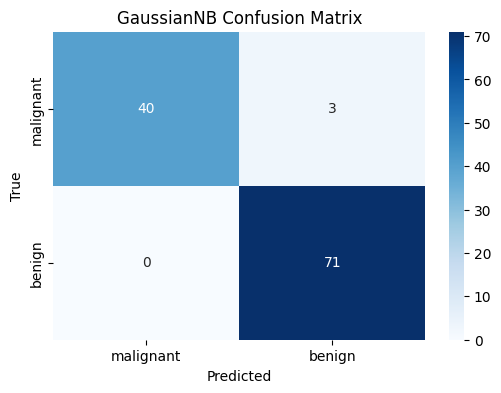

GaussianNB Cross-Validation Mean Accuracy: 0.9384711779448622
KNeighborsClassifier Accuracy: 0.956140350877193
KNeighborsClassifier Confusion Matrix:
[[38  5]
 [ 0 71]]
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.88      0.94        43
      benign       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



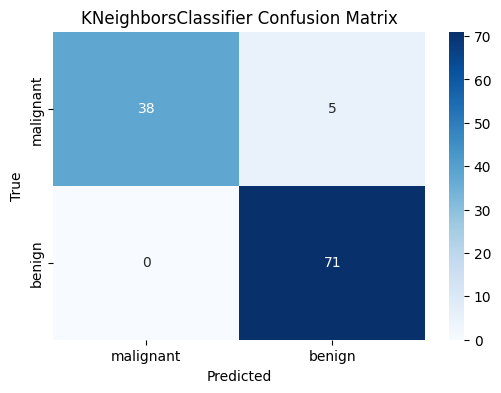

KNeighborsClassifier Cross-Validation Mean Accuracy: 0.9279135338345865
LogisticRegression Accuracy: 0.956140350877193
LogisticRegression Confusion Matrix:
[[39  4]
 [ 1 70]]
LogisticRegression Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



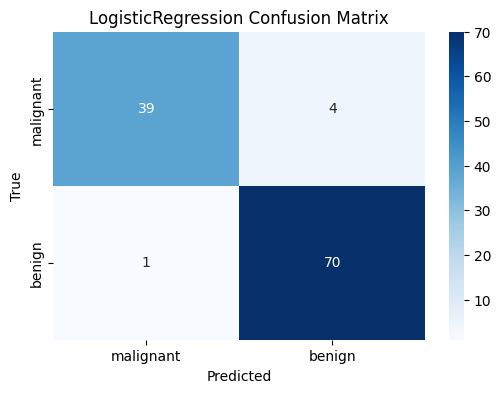

LogisticRegression Cross-Validation Mean Accuracy: 0.950814536340852
SVC Accuracy: 0.9473684210526315
SVC Confusion Matrix:
[[37  6]
 [ 0 71]]
SVC Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.86      0.92        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



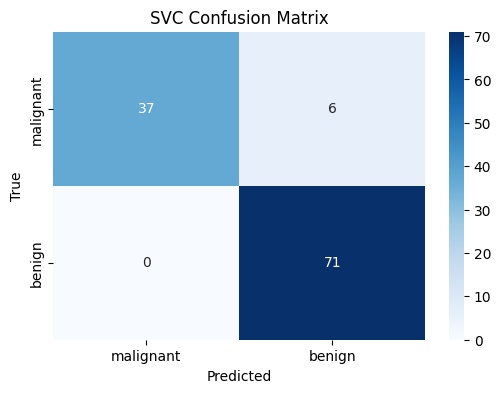

SVC Cross-Validation Mean Accuracy: 0.9191729323308271
Best Model: GaussianNB()
Best Model Accuracy: 0.9736842105263158


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


data = load_breast_cancer()
X = data.data
y = data.target


print("Sample Size:", X.shape)
print("Target Size:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

best_model = None
best_accuracy = 0

for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

    report = classification_report(y_test, y_pred, target_names=data.target_names)
    print(f"{name} Classification Report:")
    print(report)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator, X=X, y=y, cv=kfold)
    print(f"{name} Cross-Validation Mean Accuracy:", scores.mean())

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = estimator

print("Best Model:", best_model)
print("Best Model Accuracy:", best_accuracy)